$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

In [1]:
import qiskit
 
from qiskit import QuantumCircuit, transpile, execute
from qiskit.extensions import UnitaryGate
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
import numpy as np
import sys
sys.path.append("/home/anna_user2/jupyter")
from qiskit_util import *
from bell import *
from kronecker_product import *
from reverse_engineer import *










### Dirac Notation

$(1,0,0,0) \rightarrow \ket{00}$

$(0,1,0,0) \rightarrow \ket{01}$

$(0,0,1,0) \rightarrow \ket{10}$

$(0,0,0,1) \rightarrow \ket{11}$

# Measurement: Bell Operator Basis

*Physical Review Letters, 70:13, 1895. 29 March 1993*

Eqns 1,2

https://researcher.watson.ibm.com/researcher/files/us-bennetc/BBCJPW.pdf.

$U=\begin{bmatrix}
\Psi_{12}^{(+)}\\
-\Psi_{12}^{(-)}\\
\Phi_{12}^{(+)}\\
\Phi_{12}^{(-)}
\end{bmatrix}=\begin{bmatrix}
0&1&1&0\\
0&-1&1&0\\
1&0&0&1\\
1&0&0&-1
\end{bmatrix}/\sqrt{2}$

$h_0\cdot X_0 \cdot X_1\cdot CNOT_{0,1}\cdot X_1 \cdot X_0=
(\begin{bmatrix}
1&1&0&0\\
1&-1&0&0\\
0&0&1&1\\
0&0&1&-1
\end{bmatrix}/\sqrt{2})
\begin{bmatrix}
0&1&0&0\\
1&0&0&0\\
0&0&0&1\\
0&0&1&0
\end{bmatrix}
\begin{bmatrix}
0&0&1&0\\
0&0&0&1\\
1&0&0&0\\
0&1&0&0
\end{bmatrix}\begin{bmatrix}
1&0&0&0\\
0&0&0&1\\
0&0&1&0\\
0&1&0&0
\end{bmatrix}
\begin{bmatrix}
0&0&1&0\\
0&0&0&1\\
1&0&0&0\\
0&1&0&0
\end{bmatrix}
\begin{bmatrix}
0&1&0&0\\
1&0&0&0\\
0&0&0&1\\
0&0&1&0
\end{bmatrix}
=\begin{bmatrix}
0&1&1&0\\
0&-1&1&0\\
1&0&0&1\\
1&0&0&-1
\end{bmatrix}/\sqrt{2}=U$






In [2]:
counts=[]
results=[]
for input_state in [0,1]:
    data =''
    if input_state == 1:
        data = 'x one; //Data qubit |1>\n'
    repeater = \
    """
    OPENQASM 2.0;
    include "qelib1.inc";
    
    creg c[5];
    qreg one[1];
    qreg a[1];
    qreg ap[1];
    qreg bp[1];
    qreg b[1];

    gate entangle() q1,q2
    {
        x q1;
        x q2;
        h q1;
        cx q1,q2;
    }

    gate bell_measure() q1,q2
    {
        x q2;
        cx q1,q2;
        x q2;
        x q1;
        h q1;
        z q1;
    }
    

    entangle() a,ap;
    entangle() bp,b;

    
    """ + data + \
    """
    bell_measure() ap,bp;
    measure ap->c[2];
    measure bp->c[3];
    
    bell_measure() one,a;
    measure one->c[0];
    measure a->c[1];
    
    if (c==1) z b;
    if (c==2) x b;
    if (c==3) y b;
    if (c==4) z b;
    if (c==6) y b;
    if (c==7) x b;
    if (c==8) x b;
    if (c==9) y b;
    if (c==11) z b;
    if (c==12) y b;
    if (c==13) x b;
    if (c==14) z b;
    measure b->c[4];
    """
    
    qc= QuantumCircuit.from_qasm_str(repeater)
    backend=qiskit.BasicAer.get_backend('qasm_simulator')
    simulate = True
    if not simulate:
        IBMQ.load_account()
        provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
        for b in provider.backends():
            print(b)
        backend = provider.get_backend('ibmq_quito')    
        job = execute(qc, backend=backend, shots=1000)
        job_monitor(job)
        result = job.result()
    else:
        result = execute(qc, backend=backend,shots=1000).result()
    counts.append(result.get_counts())
    results.append(result)


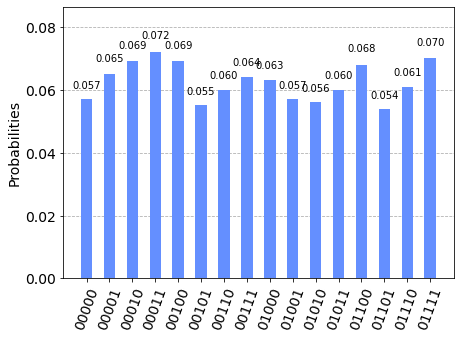

In [3]:
plot_histogram(counts[0])

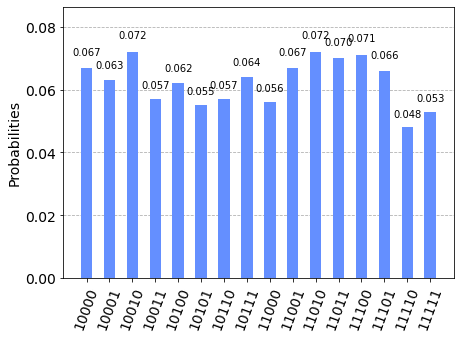

In [4]:
plot_histogram(counts[1])